<a href="https://colab.research.google.com/github/mn22abk/DSProjectHamza2024/blob/main/DSPHamzaRSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install ta
import ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=47b112841f73d3b7ad42c41a332e175bf35de1d2ed041449a136397a9439efc7
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [4]:
# Load the CSV File
df = pd.read_csv('prices.csv')


In [12]:
# Filter data for the symbol 'WLTW'
df_wltw = df[df['symbol'] == 'WLTW']


In [13]:
# Convert the 'date' column to datetime
df_wltw['date'] = pd.to_datetime(df_wltw['date'])

<ipython-input-13-b56b946261d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wltw['date'] = pd.to_datetime(df_wltw['date'])


In [14]:
# Set 'date' as the index
df_wltw.set_index('date', inplace=True)

In [15]:
# Calculate the RSI using the 'close' prices
df_wltw['RSI'] = ta.momentum.rsi(df_wltw['close'], window=14)

<ipython-input-15-d68bc5968ac0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wltw['RSI'] = ta.momentum.rsi(df_wltw['close'], window=14)


In [16]:
# Display the RSI values
print(df_wltw[['close', 'RSI']])

                 close        RSI
date                             
2016-01-05  125.839996        NaN
2016-01-06  119.980003        NaN
2016-01-07  114.949997        NaN
2016-01-08  116.620003        NaN
2016-01-11  114.970001        NaN
...                ...        ...
2016-12-23  124.489998  53.931440
2016-12-27  124.279999  53.156666
2016-12-28  122.379997  46.629623
2016-12-29  122.169998  45.957936
2016-12-30  122.279999  46.393535

[251 rows x 2 columns]


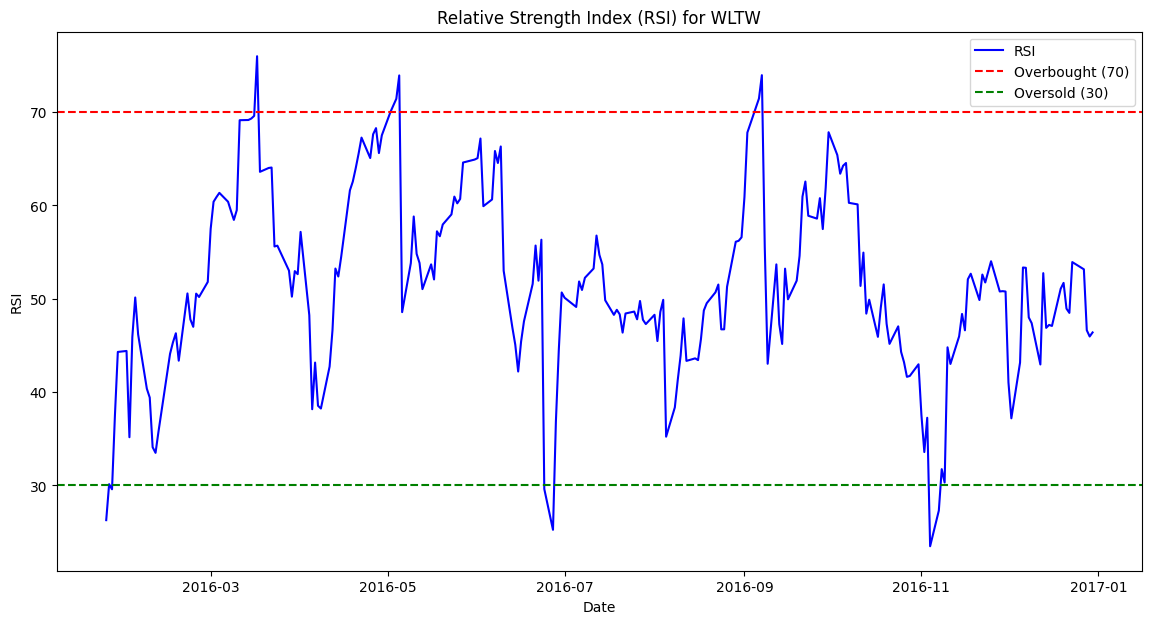

In [20]:
# Plot the RSI
def plot_rsi(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['RSI'], label='RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI) for WLTW')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()


plot_rsi(df_wltw)
